# 1. A *git* és a *github* használata

* Alapkoncepció
* Workflow
* Git repo létrehozása
* Alapvető parancsok: pull, add, commit, push
* Konfliktuskezelés
* Github

# 2. Jupyter alapok

* Telepítés, indítás
* Kernel fogalma
* Cellák fogalma, cella típusok (code, markdown, raw), cellák végrehajtása

# 3. Markdown

Normál szöveg. *Kiemelt* stílus, **nagyon kiemelt** stílus.

* Listázott tétel, sorszámozatlan
* Másik listázott tétel, sorszámozatlan
  * Aláosztáls
  * Aláosztás 2
  
Normál szöveg, [linkkel](https://github.github.com/gfm/) 

1. Sorszámozott lista
2. Sorszám folytatódik
   * Allista
   * Allista 2

Vonalat húzunk:

---

Így lehet forráskódok beágyazni:

```C
#include <stdio.h>
int main() {
    printf("Hello word!\n");
    return 0;
}
```

Végül egy táblázat:

| fejléc | második fejléc |
| --- | --- |
| első sor | első sor 2 |
| második sor | második sor 2 |
| harmadik sor | harmadik sor 2 |

... és némi matek:

$$\sum_{i=0}^\infty \alpha^i = \frac{1}{1-\alpha}$$

# 4. Multimédia tartalom

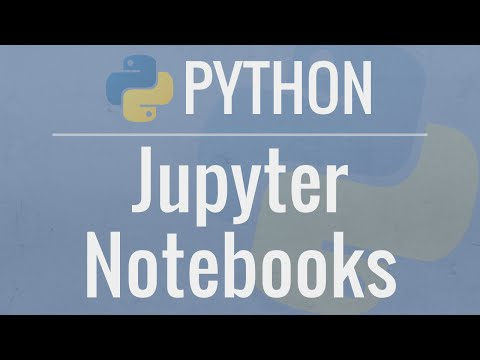

In [15]:
from IPython.display import *
# Ezt a videót mutatja meg: https://www.youtube.com/watch?v=HW29067qVWk
YouTubeVideo("HW29067qVWk")

In [19]:
Image(url="http://www.hit.bme.hu/~ghorvath/bop/hit_logo_en_darktext.svg")

# 5. Python alapok

Feltételezett ismeretek:
* C/C++ programozás
* MATLAB

Komment: a C-s /* és // helyett #

In [32]:
# változókat nem kell deklarálni, csak rögtön használni, mint matlab-ban:
a = 42
b = "alma"

In [22]:
# Elágazások:
if a==42:
    print("negvenkettő")
elif a==0:
    print("nulla")
else: 
    print("valami más")
# a blokkokat a sor eleji behúzás azonosítja, nem pedig a {} karakter, mint C-ben, vagy az "end" kulcsszó MATLAB-ban

negvenkettő


In [27]:
# Ciklusok:
for i in range(2,6):
    print(i)
# a range első paramétere a kezdőérték, a második pedig az utolsó utáni szám, amire már nem fog sor kerülni
# ennél a for sokkal többet tud - > később

2
3
4
5


In [33]:
# van while ciklus is
while a>38:
    print(b + str(a))
    a -= 1
# van -=, +=, stb., de --, ++ nincs

alma42
alma41
alma40
alma39


In [37]:
# függvények:
def hatvanyoz (alap, kitevo):
    eredm = 1
    for i in range(kitevo):
        eredm *= alap
    return eredm

# függvényhívás:
hatvanyoz(2, 6)

64

In [39]:
# függvényhívás hasznos tulajdonsága: a paraméterek nevesíthetők, és akármilyen sorrendben megadhatók
hatvanyoz(kitevo=6, alap=2)

64

# 6. Alapvető adatszerkezetek

Adatbányászat / gépi tanulás nagy mennyiségű adatot használ. Hogy lehet ezeket hatékonyan tárolni?

### 1. Python lista

A Python lista *bármilyen* típusú elemeket tartalmazhat, akár vegyesen is (egy másik lista is lehet a listában)

In [69]:
lst = [42, "alma", [3.14, 1.42]]

In [71]:
# indexelés: 0-tól indul, mint C-ben
print(lst[0])
print(lst[1])
print(lst[2])
# van negatív index is, ami a lista végétől számol
print(lst[-1])
print(lst[-2])
print(lst[-3])

42
alma
[3.14, 1.42]
[3.14, 1.42]
alma
42


In [51]:
# a for ciklus képes rajta végigiterálni, index változó nélkül:
for x in lst:
    print(x)

42
alma
[3.14, 1.42]


In [56]:
# nagyon könnyű python-ban listát építeni "list comprehension" segítségével.
# Négyzetszámok előállítása:
lst = [i*i for i in range(1,5)]
print(lst)

[1, 4, 9, 16]


In [58]:
# Feltételt is lehet használni. Ha csak a páros számok négyzeteit szeretnénk:
lst = [i*i for i in range(1,5) if i%2==0]
print(lst)

[4, 16]


In [72]:
# egész komplikált dolgokat lehet vele csinálni:
lst = [x+y for x in [10,30,50] for y in [20,40,60]]
print(lst)

[30, 50, 70, 50, 70, 90, 70, 90, 110]


In [76]:
# listából ki lehet venni egy szeletet, hasonló módon, mint MATLAB-ban.
# az első index a szelet eleje 0-tól számolva, a második pedig az utolsó utáni index
print(lst[2:5])
# ha a 2-estől a végéig szeretnénk kiírni:
print(lst[2:])
# vagy az elejétől 5-ig (azt már nem beleértve):
print(lst[:5])
# a negatív index is működik:
print(lst[3:-2])
# 3-tól 8-ig, kettesével lépve:
print(lst[3:8:2])

[70, 50, 70]
[70, 50, 70, 90, 70, 90, 110]
[30, 50, 70, 50, 70]
[50, 70, 90, 70]
[50, 90, 90]


A listával egy baj van: ez a fokú rugalmasság olyan overhead-el jár, hogy nagy mennyiségű adat tárolására nem alkalmas. Egyrészt túl sok memóriát fogyaszt, másrészt a python programok, amik nagy listán végeznek műveletet, nagyon lassúak. *Nagyon*.

### 2. Numpy array

A numpy egy python modul (egy kiegészítő könyvtár), aminek a nagy újdonsága a kalsszikus tömbök bevezetése (olyan pythonban ugyanis nincs). A tömb jellegzetessége, hogy minden elemének ugyanaz a típusa. (A listának nincs ilyen megszorítása). A tömb akárhány dimenziós lehet. A tömbök memóritakarékosak, az elemek szorosan követik egymást a memóriában, az elvesztegetett (nem hasznos adat tárolására szánt) tárterület minimális. A numpy csomag számos tömbműveletet is nyújt (összeg, átlag, szórás, minimum, maximum, stb.), melyeket nem python-ban, hanem gépi kódban valósítottak meg, így villámgyorsan végigszaladnak a tömbön.

A numpy a tudományos python alkalmazások alapvető összetevője, használata megkerülhetetlen.

In [77]:
# először behúzzuk a numpy modult, és szólunk, hogy ezentúl - a kényelem kedvéért - a kétbetűs "np" rövidítéssel szeretnénk hivatkozni rá (mint mindenki a gyakorlatban)
import numpy as np

In [84]:
# egydimenziós tömb double elemekkel
a = np.array([1.2, 3.5, 5.1])
print(a)

[1.2 3.5 5.1]


In [105]:
# többdimenziós tömb (mátrix)
b = np.array([[1., 2., 3.],[4., 5., 6.]])
print(b)

[[1. 2. 3.]
 [4. 5. 6.]]


In [94]:
# csinálunk mégegy tömböt
c = np.array([[7., 8., 9.],[10., 11., 12.]])
# tömbök elemenként összeadhatók, szorozhatók, villámgyorsan:
print(c*a)
print(c+a)

[[ 8.4 28.  45.9]
 [12.  38.5 61.2]]
[[ 8.2 11.5 14.1]
 [11.2 14.5 17.1]]


In [101]:
# van mátrix adattípus is
d = np.matrix([[7., 8., 9.],[10., 11., 12.]])
# főbb különbség a mátrixhoz képes: lehet invertálni:
print(d.I)
# transzponálni:
print(d.T)
# és a szorzás műveletet nem elemenkénti szorzásnak veszi, hanem korrekt mátrixszorzásnak:
print(d*d.T)

[[-1.94444444  1.44444444]
 [-0.11111111  0.11111111]
 [ 1.72222222 -1.22222222]]
[[ 7. 10.]
 [ 8. 11.]
 [ 9. 12.]]
[[194. 266.]
 [266. 365.]]


In [111]:
# tömelemek összege:
print(np.sum(b))
# sorösszegek:
print(np.sum(b,1))
# oszlopösszegek:
print(np.sum(b,0))
# minimum:
print(np.min(b))

21.0
[ 6. 15.]
[5. 7. 9.]
1.0


In [116]:
# részmátrix kivágása:
c[0:1,1:3]

array([[8., 9.]])

In [120]:
# nem csak az indexekkel lehet hivatkozni az elemekre, működik a logikai indexelés is. 
# az "a" tömb 2-nél nagyobb elemeinek kiválasztása
print(a[a>2])
# az indexelést egy logikai vektorral végeztük, ami az a>2-ből jött ki:
print(a>2)

[3.5 5.1]
[False  True  True]


In [124]:
# sőt, nem csak logikai indexelést használhatunk, hanem indexlistával is dolgozhatunk. Megadhatjuk azon indexeket egy listában, melyekre kíváncsiak vagyunk. 
# Ha az utolsó és az első elemre van szükség (ebben a sorrendben):
print(a[[2,0]])

[5.1 1.2]


### 3. Pandas DataFrame

A harmadik adatszerkezet, amivel sok adatot tudunk tárolni, az a Series és a DataFrame típus, ami a Pandas modul fő attrakciója.

A numpy tömbökkel szemben a DataFrame mindig 2 dimenziós (sor-oszlop szervezésű), de oszloponként eltérő típusú adatokat tartalmazhat. Pl. az egyik oszlop típusa lehet karakterlánc, a másik double, a harmadik int, a negyedik dátum, stb.
A DataFrame legfontosabb előnyei:
* nagy mennyiségű adatot képes hatékonyan tárolni és azon műveleteket végezni
* korrektül kezeli az N/A, azaz a hiányzó adatokat, ami nagyon fontos, hiszen a való életből származó adatok szinte mindig hiányosak
* az adattáblában nem csak sor és oszlopindexszel lehet az egyes adatokra hivatkozni, hanem mind a sorokat, mind az oszlopokat el lehet látni cimkékkel is

Legbelül, a DataFrame nem más, mint az oszlopok listája. Minden egyes oszlop egy "Series", ami szinte ugyanaz, mint egy numpy tömb, de az N/A kezelést és a címkével indexelést már tudja.

In [2]:
# Importáljuk be a Pandas-t
import pandas as pd

Nézzünk pár példát a Series típus használatára, ami az adattáblák oszlopait tárolja:

In [128]:
# csinálunk egy adatsort, mely 5 számból áll. Opcionálisan fel lehet címezni a sorokat, ez nem szükséges, de nagymértékben megnöveli a lehetőségeinket:
s = pd.Series([5.3, 2.2, 9.6, 1.7, 3.4], index=["alma", "körte", "meggy", "szilva", "szőlő"])
print(s)

alma      5.3
körte     2.2
meggy     9.6
szilva    1.7
szőlő     3.4
dtype: float64


In [140]:
# lássuk az indexelést. Működik "hagyományos" módon is:
print(s[2])
# ... és működik cimke szerint is:
print(s["meggy"])
# ha lenne több azonos indexű elem, azokat is mind visszaadná

9.6
9.6


In [134]:
# Tartományt is megadhatunk. Index szerint:
print(s[2:4])
# ... és cimke szerint:
print(s[["meggy", "szilva"]])

meggy     9.6
szilva    1.7
dtype: float64
meggy     9.6
szilva    1.7
dtype: float64


In [147]:
# Most vegyünk egy másik adatsort is:
q = pd.Series([6.7, 7.1, 3.2, 9.8, 5.0], index=["körte", "alma", "barack", "szilva", "szőlő"])
# ... és adjuk őket össze:
o = s+q
print(o)
# láthatóan cimkékre illesztve történt meg az összeadás, hiába nem volt sorrendben. Ahol nem talált cimke egyezést (az első esetben a "barack", a másodikban a "meggy" hiányzik),
# oda N/A elemeket tett.

alma      12.4
barack     NaN
körte      8.9
meggy      NaN
szilva    11.5
szőlő      8.4
dtype: float64


In [157]:
# számoljuk meg, hány adat hiányzik:
sum(o.isna())

2

In [158]:
# az adatsoroknak lehet nevet adni, ez lehet majd a DataFrame-ben az oszlop neve
o.rename("kert")

alma      12.4
barack     NaN
körte      8.9
meggy      NaN
szilva    11.5
szőlő      8.4
Name: kert, dtype: float64

In [167]:
# most ismerkedjünk meg a DataFrame-mel, ami egy táblázat
df = pd.DataFrame({"tavaly": [1.2, 13.4, 6.3, 2.3, np.nan], "iden":[7.6, 13.5, 5.4, 2.3, 1.2], "vevo":["Gizi", "Zozi", "Satyi", "Rezső", "Joli"]}, index=["alma", "korte", "meggy", "barack", "szilva"])
df

,tavaly,iden,vevo
alma,1.2,7.6,Gizi
korte,13.4,13.5,Zozi
meggy,6.3,5.4,Satyi
barack,2.3,2.3,Rezső
szilva,NaN,1.2,Joli


In [172]:
# oszloponként el tudjuk érni a hozzá tartozó adatsort
print(df["tavaly"])
# ... vagy akár több oszlopot is
df[["vevo", "iden"]]

alma       1.2
korte     13.4
meggy      6.3
barack     2.3
szilva     NaN
Name: tavaly, dtype: float64


,vevo,iden
alma,Gizi,7.6
korte,Zozi,13.5
meggy,Satyi,5.4
barack,Rezső,2.3
szilva,Joli,1.2


In [174]:
# adhatunk hozzá új oszlopot:
df["fontos"] = df["iden"] > 5
df

,tavaly,iden,vevo,fontos
alma,1.2,7.6,Gizi,True
korte,13.4,13.5,Zozi,True
meggy,6.3,5.4,Satyi,True
barack,2.3,2.3,Rezső,False
szilva,NaN,1.2,Joli,False


In [184]:
# Indexelés. Lehet pozíció alapján és cimke alapján is.
# Pozíció alapján sor kiválasztása:
print(df.iloc[2])
# Pozíció alapján több sor kiválasztása:
print(df.iloc[2:5])
# Cimke alapján sor kiválasztása:
print(df.loc["meggy"])
# Cimke alapján több sor kiválasztása:
print(df.loc["korte":"barack"])

tavaly      6.3
iden        5.4
vevo      Satyi
fontos     True
Name: meggy, dtype: object
        tavaly  iden   vevo  fontos
meggy      6.3   5.4  Satyi    True
barack     2.3   2.3  Rezső   False
szilva     NaN   1.2   Joli   False
tavaly      6.3
iden        5.4
vevo      Satyi
fontos     True
Name: meggy, dtype: object
        tavaly  iden   vevo  fontos
korte     13.4  13.5   Zozi    True
meggy      6.3   5.4  Satyi    True
barack     2.3   2.3  Rezső   False


In [193]:
# Többdimenziós indexelés hasonlóan.
# indexeléssel az első két sor, és a 2-3. oszlopok kiválasztása:
print(df.iloc[0:2,1:3])
# indexeléssel a 2-3. oszlopok kiválasztása:
print(df.iloc[:,1:3])
# cimkékkel az első két sor, és a 2-3. oszlopok kiválasztása:
print(df.loc["alma":"meggy","iden":"vevo"])

       iden  vevo
alma    7.6  Gizi
korte  13.5  Zozi
        iden   vevo
alma     7.6   Gizi
korte   13.5   Zozi
meggy    5.4  Satyi
barack   2.3  Rezső
szilva   1.2   Joli
       iden   vevo
alma    7.6   Gizi
korte  13.5   Zozi
meggy   5.4  Satyi


In [195]:
# új oszlop származtatása:
df.assign(osszesen=df["iden"]+df["tavaly"])

,tavaly,iden,vevo,fontos,osszesen
alma,1.2,7.6,Gizi,True,8.8
korte,13.4,13.5,Zozi,True,26.9
meggy,6.3,5.4,Satyi,True,11.7
barack,2.3,2.3,Rezső,False,4.6
szilva,NaN,1.2,Joli,False,NaN


In [201]:
# a fontos vevők nevének listázása:
df.loc[df["fontos"]==True, "vevo"]

alma      Gizi
korte     Zozi
meggy    Satyi
Name: vevo, dtype: object

In [4]:
# DataFrame betöltése file-ból:
countryCodes = pd.read_csv("data/pop/country_codes")
countryCodes

,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso
5,1040,Burundi
6,1045,Cameroon
7,1060,Cape Verde
8,1070,Central African Republic
9,1080,Chad


In [5]:
population = pd.read_csv("data/pop/pop")
population

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0
5,1125,NaN,NaN,1956,2,2,5351400.0,153600.0,584800.0,NaN,...,129500.0,54300.0,53800.0,16700.0,19000.0,29400.0,NaN,NaN,0.0,235887.0
6,1125,NaN,NaN,1957,1,2,5403000.0,160300.0,580800.0,NaN,...,118400.0,54100.0,44100.0,14900.0,12400.0,26500.0,NaN,NaN,0.0,231412.0
7,1125,NaN,NaN,1957,2,2,5392000.0,155300.0,589400.0,NaN,...,130000.0,54000.0,53500.0,16400.0,18700.0,29800.0,NaN,NaN,0.0,215811.0
8,1125,NaN,NaN,1958,1,2,5506900.0,162800.0,592000.0,NaN,...,120600.0,54600.0,44500.0,15100.0,12500.0,26700.0,NaN,NaN,0.0,255600.0
9,1125,NaN,NaN,1958,2,2,5494400.0,157800.0,600100.0,NaN,...,132400.0,54700.0,54100.0,16600.0,18800.0,30200.0,NaN,NaN,0.0,238109.0


In [9]:
# a merge művelettel hozzá tudjuk venni az országneveket a táblához
pop = population.merge(countryCodes, left_on="Country", right_on="country")[["Year","name", "Sex", "Pop1"]]

In [10]:
# leszűrjük a magyar adatokat, és összeadjuk a férfi és női lakosságot minden évre
hunpop = pop[pop["name"]=="Hungary"].groupby(["Year"]).sum()

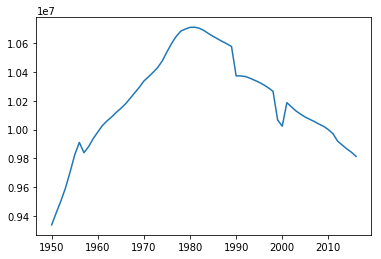

In [11]:
# kirajzoljuk az eredményt a matplotlib csomaggal
import matplotlib.pyplot as plt
plt.plot(hunpop["Pop1"])